# Problem sheet 2
Hanne Hastedt (26014013), Jonas Lührs (23617618), Matteo Meier (21222337)

In [160]:
# necessary imports
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import plotly.express as px
import colorcet

## Exercise 2.1: Customer survey.

In [2]:
# Recreate data
data = {'product_quality':  [191, 184, 133, 82, 25],
        'shop_appeal': [448, 16, 12, 146, 0],
        'customer_service': [63, 127, 171, 191, 58],
        'overall_experience': [40, 100, 126, 52, 26],
        }
index = ['Excellent', 'Good', 'Average', 'Poor', 'Appalling']
df = pd.DataFrame(data, index = index)

# Print data
print(df,'\n\nSum of answers per question:\n' + str(df.sum()))

           product_quality  shop_appeal  customer_service  overall_experience
Excellent              191          448                63                  40
Good                   184           16               127                 100
Average                133           12               171                 126
Poor                    82          146               191                  52
Appalling               25            0                58                  26 

Sum of answers per question:
product_quality       615
shop_appeal           622
customer_service      610
overall_experience    344
dtype: int64


### Comments on data
The sum of answers per questions shows that while product_quality, shop_appeal and customer_service have nearly the same amount of answers (around 615), the overall_experience question was only answered a little more than half of the times (344).

Therefore, the value of overall_rating has to be treated with care during interpretation.

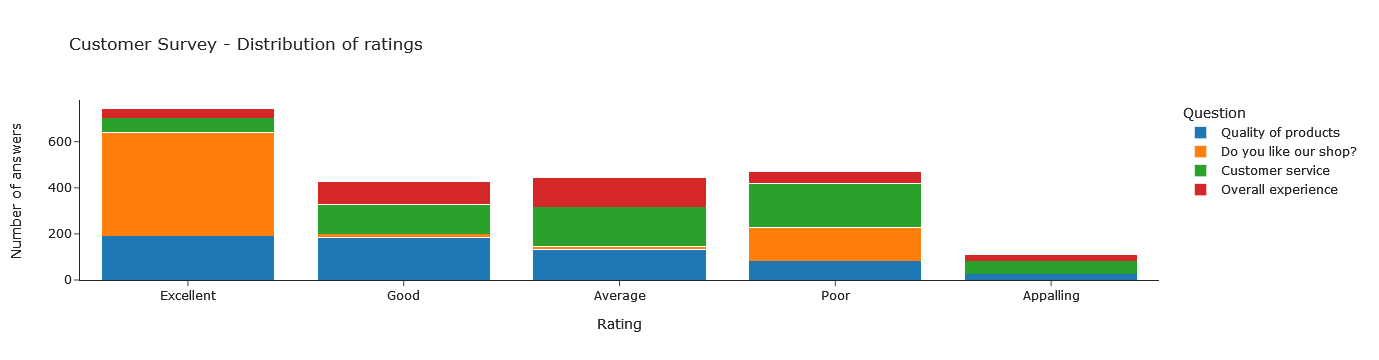

In [4]:
# Bar plot of all questions with absolute values (stacked)
df = df.rename(columns={"product_quality": "Quality of products", "shop_appeal": "Do you like our shop?", "customer_service": "Customer service", "overall_experience": "Overall experience"})
labels={"index": "Rating", "value": "Number of answers", "variable": "Question"}
fig = px.bar(df, title="Customer Survey - Distribution of ratings", barmode = 'stack', labels=labels, template='simple_white')
fig.show()

### Plot description
This plot shows the absolute number of answers for the different ratings. The focus lies on giving an overview over the overall rating distribution and should enable the reader to have the following observations:
* The most answers have the ranting excellent
* Only a small part of the answers were rated as appalling

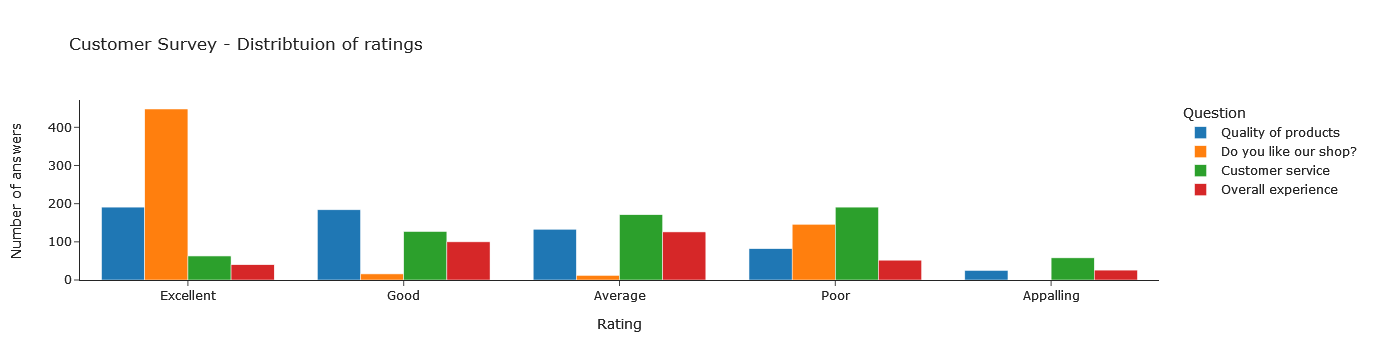

In [5]:
# Bar plot of all questions with absolute values (grouped)
fig = px.bar(df, title="Customer Survey - Distribtuion of ratings", barmode = 'group', labels=labels, template='simple_white')
fig.show()

### Plot description
This plot shows the absolute number of answers for the different ratings in a grouped form instead of a stacked form. This allows the reader to observe tendencies in the rating of the different questions. Following observations can be made:
* For "Quality of Products" there is a tendency for positive ratings to be seeen while for "Customer service" we can observe a negative tendency in the ratings
* The Question "Do you like the shop?" leads to a higher number of excellent ratings and also not nearly as high but considerably number of poor ratings. Good and average ratings are only a few. It follows that the customers are much more likely to give either an excellent or a poor rating of the company
* When looking at the "overall experience" we can observe a concentration at an average rating

### Color
In both of the previous plots color served only as a divider for the groups. In the following plot color was used to show order in the ratings from excellent (green) to appaling (red). Since red is traditionally connected to negativity this color choice will be more intuitve for the reader.

{'product_quality': array([0.31056911, 0.29918699, 0.21626016, 0.13333333, 0.04065041]), 'shop_appeal': array([0.72025723, 0.02572347, 0.0192926 , 0.23472669, 0.        ]), 'customer_service': array([0.10327869, 0.20819672, 0.28032787, 0.31311475, 0.09508197]), 'overall_experience': array([0.11627907, 0.29069767, 0.36627907, 0.15116279, 0.0755814 ])}


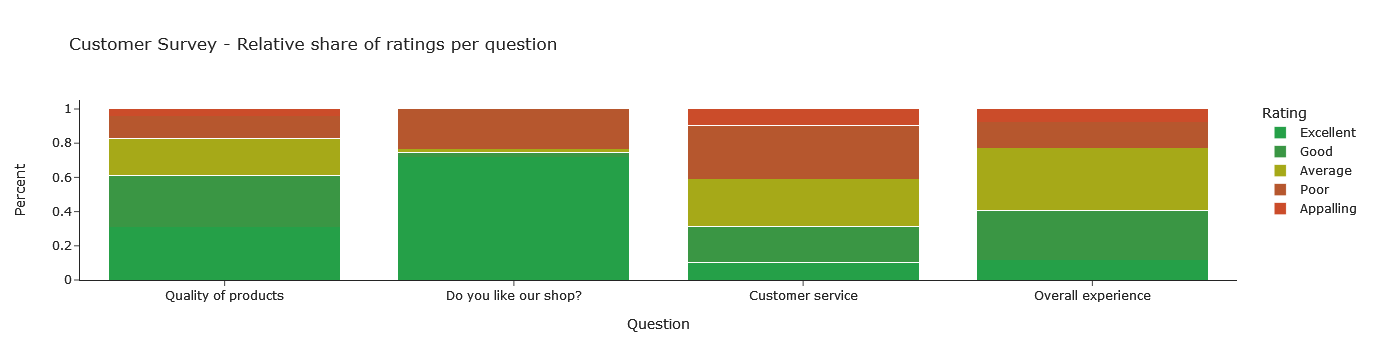

In [6]:
# Create relative values
data_rel = {'product_quality': data['product_quality'] / np.sum(data['product_quality']),
         'shop_appeal': data['shop_appeal'] / np.sum(data['shop_appeal']),
         'customer_service': data['customer_service'] / np.sum(data['customer_service']),
         'overall_experience': data['overall_experience'] / np.sum(data['overall_experience']),
         }
df_rel = pd.DataFrame(data_rel, index = index)

print(data_rel)

# Bar plot of all questions with relative values (stacked)
df_rel = df_rel.rename(columns={"product_quality": "Quality of products", "shop_appeal": "Do you like our shop?", "customer_service": "Customer service", "overall_experience": "Overall experience"})
labels={"index": "Question", "value": "Percent", "variable": "Rating"}
color_map=["#25a048", "#3a9644", "#a6a918", "#b6572e", "#cb4c2a"]
fig_bar2 = px.bar(df_rel.T, title="Customer Survey - Relative share of ratings per question",  barmode = 'stack', labels=labels, color_discrete_sequence=color_map, template='simple_white')
fig_bar2.show()

### Plot description
This plot shows the relative share of the 5 possible ratings for each question. Through the coloring emphasized the reader get easily get a grasp of the share of positive answers (average or better) and negative answers. The plot allows the following observations:
* For "Quality of Products" over 80% of the answer were average or better
* The "Customer service" has the worst rating with over 40% of the answers were rated poor or appalling

## Exercise 2.2: Visualizing the exponential function.

In [170]:
# creation of cartesian grid
extent = [-1, 1, -2*np.pi, 2*np.pi]
delta = .1
x = np.arange(extent[0], extent[1], delta)
y = np.arange(extent[2], extent[3], delta)
X, Y = np.meshgrid(x, y)

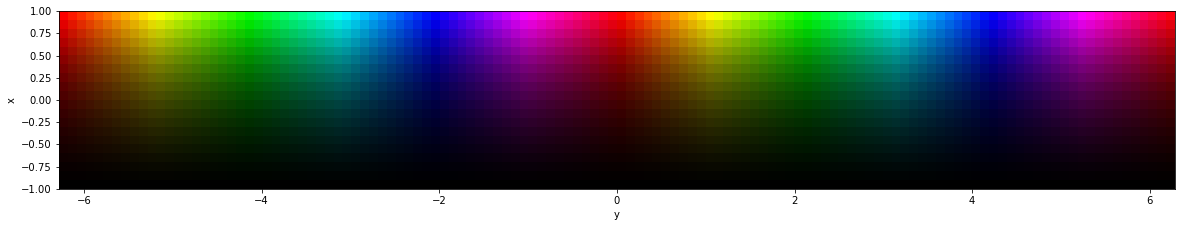

In [197]:
# compute radius
Rad = np.exp(X)

# evaluating the exponential function over the grid
Z = X + 1j * Y

# np.angle for complex output, np.mod for transformation 
Phi = np.mod(np.angle(np.exp(Z)), 2 * np.pi)

# create an empty array for the hsv image over the grid
imgHSV = np.zeros(X.shape + (3,), dtype=np.double)

# set hue
imgHSV[:,:,0] = Phi / (2 * np.pi)

# saturation to full value
imgHSV[:,:,1] = 1.

# value given by normalized [0,1] radius
# normalization
normRad = (Rad - np.min(Rad))/(np.max(Rad) - np.min(Rad))
imgHSV[:,:,2] = normRad

# transform to RGB
scale = 10
img = matplotlib.colors.hsv_to_rgb(imgHSV)
rot_img = np.rot90(img)

# show image
fig = plt.figure(figsize = (20,10))
plt.imshow(rot_img, extent=np.roll(extent, 2))
plt.xlabel('y')
plt.ylabel('x')
plt.show()